In [1]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Preprocess the data: Flatten the images into 1D arrays for RandomForest, and normalize images for CNN
x_train_flat = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255
x_test_flat = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255

x_train_cnn = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test_cnn = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

In [4]:
# Training and evaluating CNN model
cnn = cnn = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

d:\ML\digitRecogonizer\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
cnn_start_time = time.time()
cnn.fit(x_train_cnn, y_train, epochs=5, batch_size=64, verbose=0)

In [6]:
cnn_end_time = time.time()
cnn_training_time = cnn_end_time - cnn_start_time
cnn_test_loss, cnn_test_acc = cnn.evaluate(x_test_cnn, y_test, verbose=0)
cnn_y_pred = cnn.predict(x_test_cnn)
cnn_y_pred = np.argmax(cnn_y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [7]:
# Training and evaluating Random Forest model
rf_start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_flat, y_train)
rf_end_time = time.time()
rf_training_time = rf_end_time - rf_start_time

rf_y_pred = rf.predict(x_test_flat)
rf_test_acc = accuracy_score(y_test, rf_y_pred)

CNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.98      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

CNN Confusion Matrix:


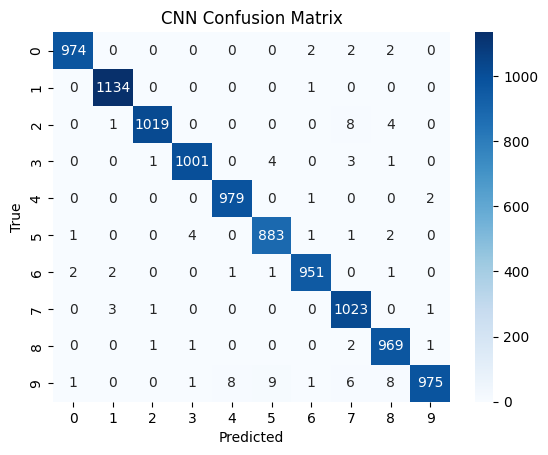

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Random Forest Confusion Matrix:


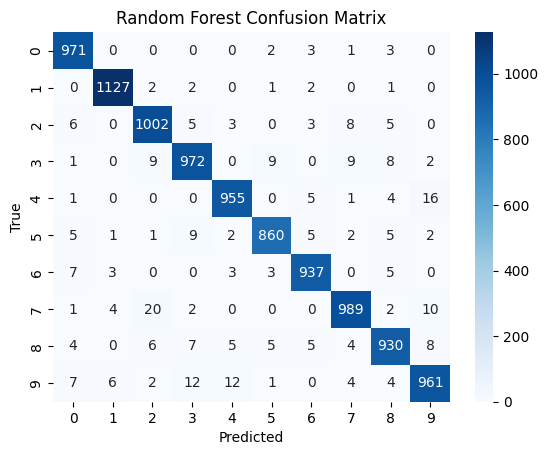

In [8]:
# Print Classification Report and Confusion Matrix for CNN
print("CNN Classification Report:\n", classification_report(y_test, cnn_y_pred))
print("CNN Confusion Matrix:")
cnn_cm = confusion_matrix(y_test, cnn_y_pred)
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print Classification Report and Confusion Matrix for Random Forest
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))
print("Random Forest Confusion Matrix:")
rf_cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

CNN Test Accuracy: 0.9908
Random Forest Test Accuracy: 0.9704
CNN Training Time: 38.05 seconds
Random Forest Training Time: 35.03 seconds


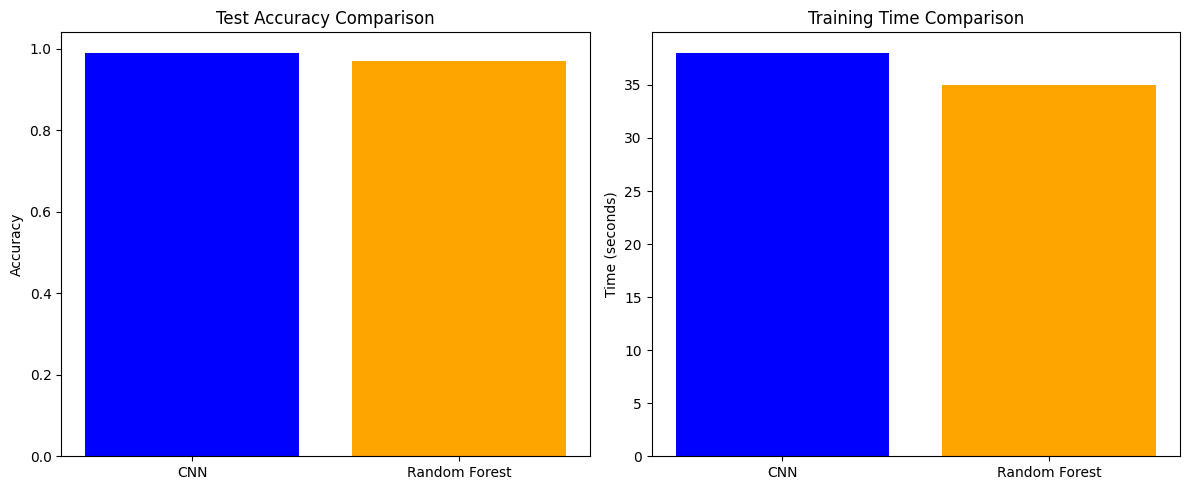

In [9]:
# Comparison Results
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")
print(f"Random Forest Test Accuracy: {rf_test_acc:.4f}")
print(f"CNN Training Time: {cnn_training_time:.2f} seconds")
print(f"Random Forest Training Time: {rf_training_time:.2f} seconds")

# Plotting the comparison
labels = ['CNN', 'Random Forest']
accuracies = [cnn_test_acc, rf_test_acc]
training_times = [cnn_training_time, rf_training_time]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy Plot
axes[0].bar(labels, accuracies, color=['blue', 'orange'])
axes[0].set_title('Test Accuracy Comparison')
axes[0].set_ylabel('Accuracy')

# Training Time Plot
axes[1].bar(labels, training_times, color=['blue', 'orange'])
axes[1].set_title('Training Time Comparison')
axes[1].set_ylabel('Time (seconds)')

plt.tight_layout()
plt.show()

In [10]:
import pickle as pkl

with open("cnn_model.pkl", "wb") as file:
    pkl.dump(cnn, file)